# Exploratory Data Analysis for Vancouver AirBnB Dataset

The purpose of this exploratory data analysis (EDA) is to understand:
- **Preliminary feature selection**: Our dataset contains many features, many of which are categorical variables. Which variables should we select (based on our understanding of AirBnB and collective personal experience) should we select to begin training our model with? 
- **The composition of our dataset**: What are the types of hosts and properties that are represented? This will help us understand the validity of the model we will develop to predict an appropriate nightly price for a new AirBnB property in Vancouver. 
- **Missing data and data preprocessing required**: How much missing data is there? Is it an acceptable amount and how will we treat missing data? What is the range of values in our features? Will we have to preprocess to normalize these values for our model to work well?


## Imports and reading in the data

Note that the data has not been provided in the GitHub repository. The `data.py` script has to be run in order to download the data to your local machine to reproduce this notebook. 

In [2]:
# Imports
import numpy as np
import pandas as pd
import altair as alt
import os

import pandas_profiling
from sklearn.model_selection import train_test_split

In [3]:
#Loading the data set
data = pd.read_csv(os.path.join('data', 'listings.csv.gz'))

In [4]:
data.head()

id                         listing_url       scrape_id last_scraped  \
0  10080  https://www.airbnb.com/rooms/10080  20191109094845   2019-11-09   
1  13188  https://www.airbnb.com/rooms/13188  20191109094845   2019-11-09   
2  13357  https://www.airbnb.com/rooms/13357  20191109094845   2019-11-09   
3  13490  https://www.airbnb.com/rooms/13490  20191109094845   2019-11-09   
4  14267  https://www.airbnb.com/rooms/14267  20191109094845   2019-11-09   

                                                name  \
0                     D1 -  Million Dollar View 2 BR   
1                  Garden level studio in ideal loc.   
2  ! Wow! 2bed 2bath 1bed den Harbour View Apartm...   
3                       Vancouver's best kept secret   
4                                  EcoLoft Vancouver   

                                             summary  \
0  Stunning two bedroom, two bathroom apartment. ...   
1  Garden level studio suite with garden patio - ...   
2  Very spacious and comfortable with very well k...   
3  This apartment rents for one month blocks of t...   
4  The Ecoloft is located in the lovely, family r...   

                                               space  \
0  Bed setup: 2 x queen, option to add up to 2 tw...   
1  Very Close (3min walk) to Nat Bailey baseball ...   
2  Mountains and harbour view 2 bedroom,2 bath,1 ...   
3  Vancouver city central, 700 sq.ft., main floor...   
4  West Coast Modern Laneway House Loft: We call ...   

                                         description experiences_offered  \
0  Stunning two bedroom, two bathroom apartment. ...                none   
1  Garden level studio suite with garden patio - ...                none   
2  Very spacious and comfortable with very well k...                none   
3  This apartment rents for one month blocks of t...                none   
4  The Ecoloft is located in the lovely, family r...                none   

                               neighborhood_overview  ... instant_bookable  \
0                                                NaN  ...                t   
1  The uber hip Main street area is a short walk ...  ...                t   
2  Amanzing bibrant professional neighbourhood. C...  ...                f   
3  In the heart of Vancouver, this apartment has ...  ...                f   
4  We live in the centre of the city of Vancouver...  ...                t   

  is_business_travel_ready          cancellation_policy  \
0                        f  strict_14_with_grace_period   
1                        f                     moderate   
2                        f  strict_14_with_grace_period   
3                        f  strict_14_with_grace_period   
4                        f  strict_14_with_grace_period   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             t                                t   
3                             f                                f   
4                             f                                f   

   calculated_host_listings_count  \
0                              43   
1                               1   
2                               3   
3                               1   
4                               1   

   calculated_host_listings_count_entire_homes  \
0                                           43   
1                                            1   
2                                            1   
3                                            1   
4                                            1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            2   
3                                            0   
4                                            0   

   calculated_hos

## Preliminary feature selection

Let's understand the number of data points and features our dataset has.

In [5]:
print("Our dataset has", data.shape[0],"number of rows and", data.shape[1],"number of columns")

Our dataset has 6181 number of rows and 106 number of columns


As we expected, our dataset has many more features than we would want to start with in our baseline model. Simpler models are better and more interpretable so we want to prune our dataset to only include features that:
1. We would reasonably expect to know when considering setting up a new AirBnB property
2. We believe matters most to nightly price based on our understanding of the AirBnB booking system

We decided on three categories of features: 
1. **Host-related information** such as host response rate to requests, whether the host is a superhost, whether the host identity has been verified
2. **Property-related information** such as property type, the neighborhood, number of people who can be accommodated, number of bathrooms, bedrooms and beds
3. **Booking-related information** such as whether the property can be instantly booked, the cancellation policy



There are also several potential target variables that relate to pricing we can select including monthly, weekly and nightly price. Our chosen target variable is nightly price since we believe that is the one that is most commonly used when booking a property.

We select these features and our target variable from our data below. Then we split our data into X and y training and test sets before doing further EDA. 

In [6]:
# Preprosessing part

#List of chosen features
selected = ['id', 'host_id', 'host_response_rate', 'host_is_superhost', 'property_type', 
             'host_identity_verified', 'neighbourhood_cleansed', 'instant_bookable', 'cancellation_policy', 
            'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price'
           ]

data.drop(data.columns.difference(selected), axis = 1, inplace = True)

#Changing format of price column 
data.price = data.price.str.replace('$', '').str.replace(',', '').astype(float)

#Changing format of host response rate column
data['host_response_rate'] = data['host_response_rate'].str.rstrip('%').astype('float') / 100.0

#Splitting data into test and train 
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = 'price'), 
                                                    data[['price']], 
                                                    test_size = 0.2,
                                                   random_state = 123)

X_train['price'] = y_train

In [7]:
X_train.head()

id    host_id  host_response_rate host_is_superhost  \
3210  28462644   19201130                 0.8                 f   
1475  16599114   10617862                 1.0                 f   
5753  38856942   41546711                 1.0                 f   
3822  32503415   64045071                 1.0                 f   
4869  36278131  103182440                 1.0                 f   

     host_identity_verified neighbourhood_cleansed property_type  \
3210                      f      Downtown Eastside   Condominium   
1475                      t     Grandview-Woodland         House   
5753                      t        West Point Grey         House   
3822                      t               Downtown   Condominium   
4869                      f               Downtown     Apartment   

      accommodates  bathrooms  bedrooms  beds instant_bookable  \
3210             4        2.0       2.0   2.0                f   
1475             2        2.5       1.0   1.0                f   
5753             1        1.0       1.0   0.0                t   
3822             5        1.0       2.0   2.0                f   
4869             4        1.0       1.0   1.0                t   

              cancellation_policy  price  
3210                     moderate  199.0  
1475                     moderate   81.0  
5753  strict_14_with_grace_period   36.0  
3822  strict_14_with_grace_period   40.0  
4869  strict_14_with_grace_period  399.0

## Composition of our dataset and missing data

To begin our EDA, we want to use Pandas Profiling Report. We want to understand the composition of the type of hosts, properties and bookings in our dataset. 

In [32]:
pandas_profiling.ProfileReport(X_train)

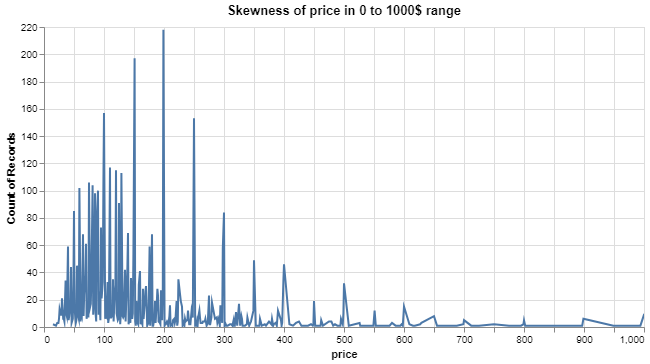

In [88]:
alt.Chart(X_train).mark_line(clip = True).encode(
    alt.X('price:Q',
         scale=alt.Scale(domain=(0, 1000))),
    alt.Y('count()')).properties(width=600, height = 300, title = 'Skewness of price in 0 to 1000$ range')

I noticed that count of postings peak highly near round numbers like (150, 200 and 250). Likely due to simple appeal of the rounder number.  



**Bookings per neighbourhood:**

In [69]:
#Code assigns labels for a chosen price category.  
price_data_2 = X_train[['price', 'neighbourhood_cleansed', 'property_type']]
price_data_2['label'] = pd.cut(price_data_2['price'], bins=[0, 100, 300, 500, 13000], include_lowest=True, labels=['low', 'mid', 'high', 'exceptional'])

C:\Users\Polina\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
price_data_2

price neighbourhood_cleansed property_type label
3210  199.0      Downtown Eastside   Condominium   mid
1475   81.0     Grandview-Woodland         House   low
5753   36.0        West Point Grey         House   low
3822   40.0               Downtown   Condominium   low
4869  399.0               Downtown     Apartment  high
...     ...                    ...           ...   ...
5218  298.0               West End     Apartment   mid
4060   65.0      Downtown Eastside         House   low
1346   59.0       Hastings-Sunrise   Guest suite   low
3454  223.0               West End   Condominium   mid
3582  110.0         Mount Pleasant   Condominium   mid

[4944 rows x 4 columns]

## Guide for labeling

low = $(0, 100]$

mid = $(100, 300]$

high = $(300, 500]$

exceptional = $(300, 13000]$


In [75]:
#Table for total count of Airbnb listings per price category in a neighbourhood. Can be used for exploratory purposes. 
by_neighboorhood = price_data_2.groupby(['label', 'neighbourhood_cleansed']).count().reset_index()
by_neighboorhood = by_neighboorhood.drop(['property_type'], axis = 1).rename(columns={"price": "count"})

#Selection
by_neighboorhood.loc[by_neighboorhood['label'] == 'low']

label    neighbourhood_cleansed  count
0    low             Arbutus Ridge   39.0
1    low                  Downtown  204.0
2    low         Downtown Eastside   52.0
3    low         Dunbar Southlands   62.0
4    low                  Fairview   45.0
5    low        Grandview-Woodland  100.0
6    low          Hastings-Sunrise  125.0
7    low  Kensington-Cedar Cottage  155.0
8    low                Kerrisdale   48.0
9    low                 Killarney   37.0
10   low                 Kitsilano  117.0
11   low                   Marpole  113.0
12   low            Mount Pleasant   75.0
13   low                  Oakridge   63.0
14   low       Renfrew-Collingwood  138.0
15   low                Riley Park  151.0
16   low               Shaughnessy   37.0
17   low              South Cambie   30.0
18   low                Strathcona    5.0
19   low                    Sunset   46.0
20   low       Victoria-Fraserview   52.0
21   low                  West End  115.0
22   low           West Point Grey   42.0

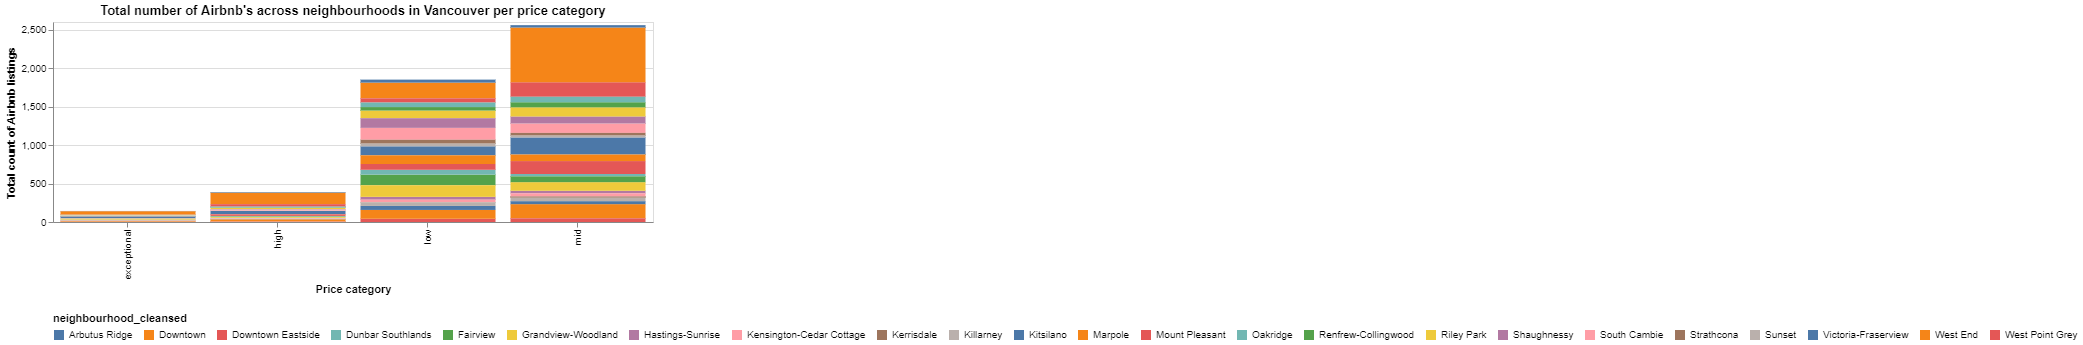

In [83]:
#Visualization part. Choose neighbourhood to see specified graph 

select_box = alt.binding_select(options=list(price_data_2['neighbourhood_cleansed'].unique()))
selection = alt.selection_single(name='Select', fields=['neighbourhood_cleansed'], bind=select_box)

b_line = alt.Chart(price_data_2).mark_bar().encode(
    alt.X('label:N', title = 'Price category'),
    alt.Y('count()', title = 'Total count of Airbnb listings'),
    color = 'neighbourhood_cleansed').properties(width=600, height = 200)

b_line.add_selection(
    selection
).transform_filter(
    selection
).configure_legend(
    orient='bottom'
).properties(
    title = "Total number of Airbnb's across neighbourhoods in Vancouver per price category"
)


**Properties:** 

In [80]:
#Table for total count of Airbnb listings per price category in a neighbourhood. Can be used for exploratory purposes. 

by_property_type = price_data_2.groupby(['label', 'property_type']).count().reset_index()

by_property_type = by_property_type.drop(['neighbourhood_cleansed'], axis = 1).rename(columns={"price": "count"})

#Selection
by_property_type.loc[by_property_type['label'] == 'low']


label       property_type  count
0    low          Aparthotel    NaN
1    low           Apartment  360.0
2    low   Bed and breakfast    6.0
3    low                Boat    NaN
4    low      Boutique hotel    1.0
5    low            Bungalow   12.0
6    low               Cabin    1.0
7    low           Camper/RV    2.0
8    low         Condominium  203.0
9    low             Cottage    3.0
10   low         Guest suite  261.0
11   low          Guesthouse   22.0
12   low               Hotel    1.0
13   low               House  854.0
14   low                Loft   16.0
15   low               Other    2.0
16   low  Serviced apartment   18.0
17   low           Timeshare    NaN
18   low          Tiny house    1.0
19   low           Townhouse   42.0
20   low               Villa   46.0

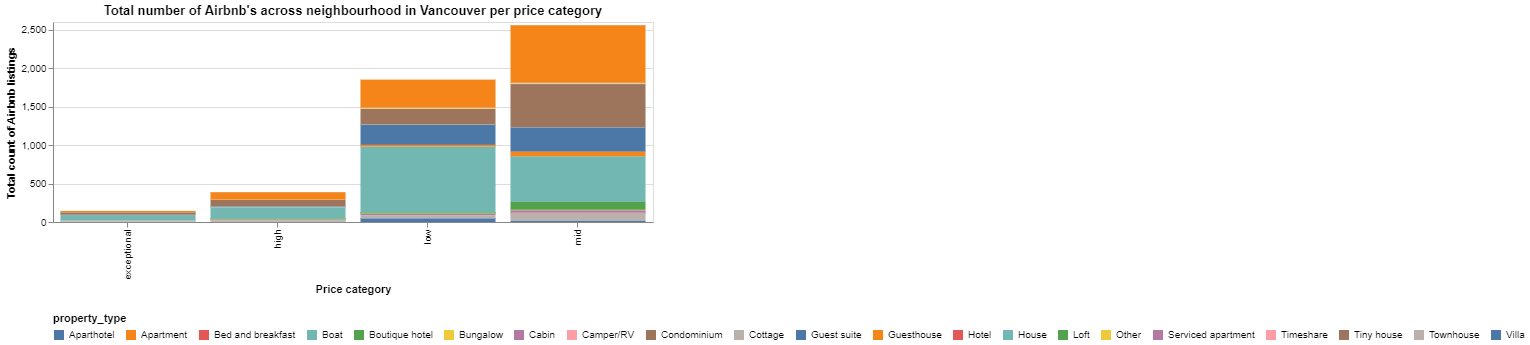

In [82]:
#Visualization part. Choose property type to see specified graph 

select_box_2 = alt.binding_select(options=list(price_data_2['property_type'].unique()))
selection_2 = alt.selection_single(name='Select', fields=['property_type'], bind=select_box_2)

b_line_2 = alt.Chart(price_data_2).mark_bar().encode(
    alt.X('label:N', title = 'Price category'),
    alt.Y('count()', title = 'Total count of Airbnb listings'),
    color = 'property_type').properties(width=600, height = 200)

b_line_2.add_selection(
    selection_2
).transform_filter(
    selection_2
).configure_legend(
    orient='bottom'
).properties(
    title = "Total number of Airbnb's for a property type in Vancouver per price category"
)

## Missing data

We can see that our data has missing values that we'll have to deal with in the future for a model we'll choose. The highest percentage of missing values we observe in features 'bedrooms', 'beds', 'host_response rate', two of which are expected to have high influence on the predicted value.

## Further feature processing

With our preprocessing and collecting data into a reasonable, exploarable format being done it's time to answer most importaint questions. What's our research question is and will this data set be able to help us find the answer. 
In our proposal we came up with the question: How high should one's price per night of stay be for a rental unit in Vancouver? This wrangled data set now contains features that undisputably will have an influence on the end answer (like number of rooms or beds at a unit) and features which influence we're curious about (i.e. if a host has 'superhost' status). So we believe that the data set is reasonable for the research question.        

In [8]:
X_train['neighbourhood_cleansed'].unique()

array(['Downtown', 'Arbutus Ridge', 'Hastings-Sunrise', 'Kitsilano',
       'Downtown Eastside', 'West End', 'Kensington-Cedar Cottage',
       'Riley Park', 'Dunbar Southlands', 'Mount Pleasant', 'Marpole',
       'South Cambie', 'Renfrew-Collingwood', 'Victoria-Fraserview',
       'Killarney', 'Grandview-Woodland', 'Oakridge', 'Kerrisdale',
       'Fairview', 'Strathcona', 'Shaughnessy', 'Sunset',
       'West Point Grey'], dtype=object)

One of the most challenging and variable parts of the data is the amount of the neighbourhoods Airbnb classified in Vancouver and greater area, which is 23. Potential solution could be combining neighouring ones to a bigger area, making model less specific. 

Property type has 21 unique inputs, might be reasonable to consider selecting a few features for the purpose of this project.  